# Linked-list 형태의 Posting
- Inverted Index 사용
    - Inverted index의 장점 -> 수정이 쉽다.
- Posting 방식
    - TDM에서 Document(postings)를 디스크에 따로 둔다. (메모리에 올리지 않아도 됨)
        - FILE(각 문서) ----- V(Controled Vocabulary) : 둘을 분리 시킨다.

    - **포인터** 개념으로 posting에 **효율적인 액세스** 구조
- 아래 예제에서는 포인터의 개념만 이해하기 위해서 postings를 메모리에 올린 채로 실습한다. 디스크에 분리하는 방법은 나중에 또 실습할 것임.

In [1]:
from konlpy.corpus import kobill
from konlpy.tag import Kkma

In [2]:
from collections import defaultdict

Documents = list()

kkma = Kkma()
Lexicon = list()

t2i = lambda t:Lexicon.index(t)
i2t = lambda t:Lexicon[t]

d2i = lambda t:Documents.index(t)
i2d = lambda t:Documents[t]

Dicts = defaultdict(lambda: -1)
Postings = list()

for document in [kobill.open(_).read()
                 for _ in kobill.fileids()]:
    Documents.append(document)
    docID = d2i(document)
    for term in [_ for _ in kkma.morphs(document)
              if 1 < len(_) < 6]:
        if term not in Lexicon:
            Lexicon.append(term)
            
        ptr = Dicts[term] # 포인터 = next
        termID = t2i(term)
        postingPtr= len(Postings)
        Postings.append((termID, docID, 1, ptr)) 
            # 원래 1 대신에 들어가야하는 것은 frequency이다.                     
            # 지금은 boolean 모델이므로 term이 document에 있냐 없냐만 중요하다.
            # Ranking model에서는 frequency가 필요하다.
            # frequency 계산하는 실습은 뒤이어서 해볼 것이다.
        Dicts[term] = postingPtr

C:\Users\JINHYO\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
len(Lexicon), len(Documents), Dicts["국민"]

(1139, 10, 6438)

In [4]:
Postings[Dicts[i2t(0)]]

(0, 8, 1, 6660)

In [5]:
# ptr는 Postings에서 자기 앞에 있는 자기와 같은 term의 위치를 나타낸다.
# 아래 출력을 보면, 아래에서부터 ptr은 바로 위의 인덱스와 같다.

print("인덱스, (termID, docID, freq, ptr)")
[(i, _) for i, _ in enumerate(Postings) if _[0]==5]

인덱스, (termID, docID, freq, ptr)


[(5, (5, 0, 1, -1)),
 (14, (5, 0, 1, 5)),
 (560, (5, 0, 1, 14)),
 (888, (5, 1, 1, 560)),
 (897, (5, 1, 1, 888)),
 (1443, (5, 1, 1, 897)),
 (1771, (5, 2, 1, 1443)),
 (1780, (5, 2, 1, 1771)),
 (2482, (5, 2, 1, 1780)),
 (2816, (5, 3, 1, 2482)),
 (2825, (5, 3, 1, 2816)),
 (3375, (5, 3, 1, 2825)),
 (5143, (5, 6, 1, 3375)),
 (5146, (5, 6, 1, 5143)),
 (5157, (5, 6, 1, 5146))]

In [7]:
ptr = Dicts[i2t(0)] # 첫번째 pointer가 필요함.
                    # Dicts는 가장 마지막 ptr를 가지고 있음.
while ptr != -1: # ptr가 -1이면 마지막이다. 
    _struct = Postings[ptr]
    print("Query:", i2t(_struct[0]), "docID:", _struct[1], "next:", _struct[-1])
    ptr = _struct[-1]

Query: 지방 docID: 8 next: 6660
Query: 지방 docID: 7 next: 3627
Query: 지방 docID: 3 next: 3233
Query: 지방 docID: 3 next: 3197
Query: 지방 docID: 3 next: 3124
Query: 지방 docID: 3 next: 3121
Query: 지방 docID: 3 next: 2734
Query: 지방 docID: 2 next: 2340
Query: 지방 docID: 2 next: 2304
Query: 지방 docID: 2 next: 2231
Query: 지방 docID: 2 next: 2228
Query: 지방 docID: 2 next: 1695
Query: 지방 docID: 1 next: 1301
Query: 지방 docID: 1 next: 1265
Query: 지방 docID: 1 next: 1192
Query: 지방 docID: 1 next: 1189
Query: 지방 docID: 1 next: 812
Query: 지방 docID: 0 next: 418
Query: 지방 docID: 0 next: 382
Query: 지방 docID: 0 next: 309
Query: 지방 docID: 0 next: 306
Query: 지방 docID: 0 next: 279
Query: 지방 docID: 0 next: 78
Query: 지방 docID: 0 next: 73
Query: 지방 docID: 0 next: 0
Query: 지방 docID: 0 next: -1


In [8]:
Query = "법안 의원"
Result = list()
for q in [_ for _ in kkma.morphs(Query)
         if 1 < len(_) < 6]:
    candidates = list()
    ptr = Dicts[q]
    while ptr != -1:
        _struct = Postings[ptr]
        candidates.append(_struct[1])
        ptr = _struct[-1]
    Result.append(candidates)
candidates

[9, 9, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0]

---

### term frequency 포함해서 Posting하기

In [9]:
Documents = list()

kkma = Kkma()
Lexicon = list()

t2i = lambda t:Lexicon.index(t)
i2t = lambda t:Lexicon[t]

d2i = lambda t:Documents.index(t)
i2d = lambda t:Documents[t]

Dicts = defaultdict(lambda: -1)
Postings = list()

for docName in kobill.fileids():
    document = kobill.open(docName).read()
    Documents.append(docName)
    docID = d2i(docName)
    localPostings = defaultdict(int)
    for term in [_ for _ in kkma.morphs(document)
              if 1 < len(_) < 6]:
        if term not in Lexicon:
            Lexicon.append(term)
        localPostings[term] += 1
            
    for term, freq in localPostings.items():
        ptr = Dicts[term]
        termID = t2i(term)
        postingPtr= len(Postings)
        Postings.append((termID, docID, freq, ptr)) # frequency 넣음
        Dicts[term] = postingPtr

In [10]:
Dicts["행정"], Postings[2390]

(2390, (236, 9, 2, 1343))

---

# 오늘 공부 내용
- Day 1: Boolean and vector space model
- http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/docs/PDFs/Boolean&VS%20model.pdf

# Boolean model
- 문서 내에 query가 있냐 없냐로만 검색함. -> 모든 검색 결과를 제공한다.(순위가 없다)
- 논리 연산자에 따라서 query 검색결과를 조합한다.
    - AND: 교집합
    - OR: 합집합
    - NOT: 차집합
- 단점: 
    - query가 너무 특이해서 검색결과가 없는 경우
    - query가 너무 흔해서 검색결과가 너무 많은 경우
    - 사용자가 query를 잘 써야함.(일반인에게 난이도가 높을 수 있음)
    - 문서 중에 어느게 더 중요한지 순위를 매길 수 없음.
- 전문적으로 해야하는 검색에서 사용함 
    - 예) 법령 검색, 헌법 검색, 유사특허검색, 도서관 사서 등
    
- 한계:
    - 사용자의 needs에 따라서 query는 다른 중요성을 갖는다.
    - 모든 문서는 동등하게 중요할 수 없다.  
        => 중요성은 정도의 문제이므로 0과 1로 구분할 수 없다. 
        
        
- 지금까지 실습했던 내용들은  Boolean model이었다.

---

# Ranking model
- Relevance
    - 정도를 표현할 수 있다. -> 비교할 수 있다. -> 순위를 매길 수 있다.
- Relevance 종류
    - **Similarity** \* 가장 사랑받는 녀석!
        - Bag of Words 를 쓸 수 있다.(벡터로 표현 가능)
    - Probability of Relevance
        - Bag of Words를 쓸 수 없다(모든 문서는 동등하지 않다고 가정함.)
    - Probabilistic inferenced
        - Bag of Words를 쓸 수 없다(모든 문서는 동등하지 않다고 가정함.)

# 벡터 공간 모델(VS Model, Vector Space Model)
- Ranking model의 relevance를 similarity로 구한다.
- Query와 documents는 같은 형식으로 표현할 수 있음을 가정한다.
    - concept vector로 표현한다.
    - 각 concept는 하나의 dimension을 정의한다.
    - vector의 요소는 weight(가중치)이다.
- concept space 내에서 query vector와 document vector 간의 거리로 유사도(similarity)를 구할 수 있다.


- 개념도
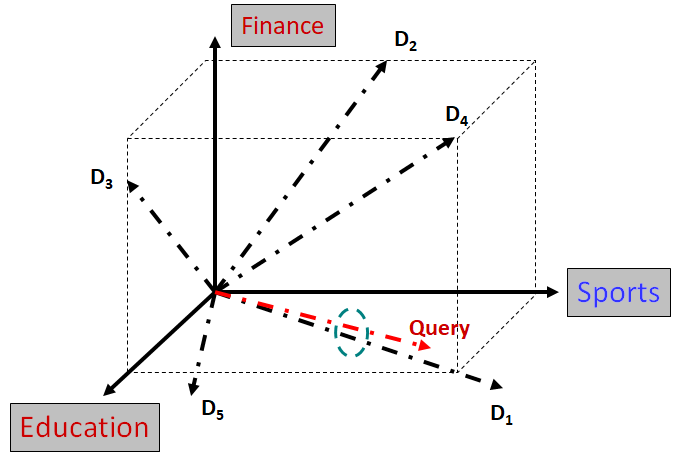

- 모든 vector는 Orthogonal해야한다.
    - 모든 term은 independent해야 한다. 
    - N-gram, BOW(bag-of-words)를 쓸 수 있다.
- weight를 산출하는 것은 중요하다.
    - Query 측면: 모든 query term이 동일한 가치를 지니고 있지 않으므로 가중치가 필요
    - Doc 측면: 어떠한 term은 콘텐츠에 대해서 더 많은 정보를 가지고 있으므로 가중치가 필요

# TF-IDF
1. VS model의 heuristic한 concepts
1. TF와 IDF를 결합하여 단어의 중요도를 수치로 표현한 것.
2. **TF-IDF**는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. 단어에 가중치를 매기는 방법입니다.

3. TF-IDF는 zipf's law에 기반합니다.
    - 빈도가 너무 많거나, 너무 적으면 가중치를 낮게 준다. => 중간 단어가 가중치가 높다.


### TF(Term Frequecny)
- 한 document 내에서 term이 등장하는 빈도
- TF가 높다 => term의 중요도가 높다
- 왜냐? 여러번 등장한다는 것은 해당 document의 main topic일 확률이 높기 때문이다.
- 예시: (경제기사에서) 시황, 주가, 호황, 영업이익 / (의료분야에서) 간암, 메스, 수술, 회복
- 다음과 같이 표현한다.
$$
tf(t,d)
$$
    
    
### IDF(Inverted Document Frequency)
- 전체 document 중에서 term이 1번이라도 등장했던 document의 빈도(=DF) 의 역
- DF가 높다 => term의 중요도가 낮다
- IDF가 높다 => term의 중요도가 높다 (DF의 역이므로)
- 왜냐? 많은 document에서 자주 쓰이는 term은 불용어일 확률이 높기 때문이다.
- 예시: 나는, 습니다, 읍니다, I, am, a, the 등
    

- IDF의 계산식 설명
    - 단순히 Document Frequency의 역이라면 N/df(t)이어야하는데 아래와 같은 식이 나온 이유
$$
IDF(t) = log(\frac{N}{df(t) + 1})
$$
    - log를 사용하는 이유: 전체 document의 갯수인 N이 커질수록 IDF의 값이 너무 커지는 것을 방지하기 위해서 사용함.
    - df(t)에 1을 더하는 이유: t가 모든 document에서 등장하지 않아 0일때 나눗셈 에러를 대비한 스무딩 기법.

### tf-idf 실습 해봅시다!

In [11]:
# TF(Term-Frequency)
from math import log

tf1 = lambda t: 1
tf2 = lambda _struct: _struct[1]
tf3 = lambda t:0
tf4 = lambda _struct, t: log(1 + _struct[1])
tf6 = lambda tf, maxtf, a:a+(1-a)*(tf/maxtf)
tf5 = lambda tf, maxtf: tf6(tf, maxtf, 0.5)

In [12]:
_Collections = [
    ["A", "A", "A",  "A", "A"],
    ["A", "A", "A",  "A", "B"],
    ["A", "A", "A",  "A", "C"],
]

_Vocabulary = ["A", "B", "C"]
_Lexicon = defaultdict(lambda: -1)
_Document = defaultdict(int)
_Posting = list()

for d in _Collections:
    _localPosting = defaultdict(int)
    for t in d:
        if t not in _Vocabulary:
            _Vocabulary.append(t)
        _localPosting[t] += 1
    docID = len(_Document)
    _Document[docID] = max(_localPosting.values())
    for t, f in _localPosting.items():
        ptr = _Lexicon[t]
        nextPtr = len(_Posting)
        _Posting.append((docID, f, ptr)) 
        # 이번 실습에서는 termID를 빼고 _Posting에 저장하므로 헷갈리지 않도록 주의!
        _Lexicon[t] = nextPtr

In [13]:
_Lexicon, _Document, _Vocabulary

(defaultdict(<function __main__.<lambda>()>, {'A': 3, 'B': 2, 'C': 4}),
 defaultdict(int, {0: 5, 1: 4, 2: 4}),
 ['A', 'B', 'C'])

In [14]:
_Posting

[(0, 5, -1), (1, 4, 0), (1, 1, -1), (2, 4, 1), (2, 1, -1)]

In [15]:
for t, ptr in _Lexicon.items():
    while ptr != -1:
        _struct = _Posting[ptr]
        print("단어:{0}, 문서:{1}, 빈도:{2}, 최고빈도:{3}"
              .format(
                  t, _struct[0], _struct[1],
                  _Document[_struct[0]]))
        ptr = _struct[-1]

단어:A, 문서:2, 빈도:4, 최고빈도:4
단어:A, 문서:1, 빈도:4, 최고빈도:4
단어:A, 문서:0, 빈도:5, 최고빈도:5
단어:B, 문서:1, 빈도:1, 최고빈도:4
단어:C, 문서:2, 빈도:1, 최고빈도:4


In [17]:
for t, ptr in _Lexicon.items():
    while ptr != -1:
        _struct = _Posting[ptr]
        tf = _struct[1]
        maxtf = _Document[_struct[0]]
        print("단어:{0}, 문서:{1}, 빈도:{2}, 최고빈도:{3}"
              .format(
                  t, _struct[0], tf, maxtf))
        print("TF1={}".format(tf1(t)))
        print("TF2={}".format(tf2(_struct)))
        print("TF4={}".format(tf4(_struct, t)))
        print("TF5={}".format(tf5(tf, maxtf)))
        print("TF6={}".format(tf6(tf, maxtf, 0)))
        print()
        ptr = _struct[-1]

단어:A, 문서:2, 빈도:4, 최고빈도:4
TF1=1
TF2=4
TF4=1.6094379124341003
TF5=1.0
TF6=1.0

단어:A, 문서:1, 빈도:4, 최고빈도:4
TF1=1
TF2=4
TF4=1.6094379124341003
TF5=1.0
TF6=1.0

단어:A, 문서:0, 빈도:5, 최고빈도:5
TF1=1
TF2=5
TF4=1.791759469228055
TF5=1.0
TF6=1.0

단어:B, 문서:1, 빈도:1, 최고빈도:4
TF1=1
TF2=1
TF4=0.6931471805599453
TF5=0.625
TF6=0.25

단어:C, 문서:2, 빈도:1, 최고빈도:4
TF1=1
TF2=1
TF4=0.6931471805599453
TF5=0.625
TF6=0.25



In [18]:
# IDF(Inversed Document Frequency)

idf1 = lambda df, N:log(N/df) # inverse document frequency
idf2 = lambda df, N:log(N/(1+df)) # inverse document frequency smooth
idf3 = lambda df, N:log((1 + N-df)/df) 

In [19]:
N = len(_Collections)

for t, ptr in _Lexicon.items():
    dfPtr = ptr
    df = 0
    while dfPtr != -1:
        _struct = _Posting[dfPtr]
        dfPtr = _struct[-1]
        df += 1
    while ptr != -1:
        _struct = _Posting[ptr]
        tf = _struct[1]
        print("단어:{0}, 문서:{1}, 빈도:{2}, 최고빈도:{3}"
              .format(
                  t, _struct[0], _struct[1],
                  maxtf))
        print("TF1={}".format(tf1(t)))
        print("TF2={}".format(tf2(_struct)))
        print("TF4={}".format(tf4(_struct, t)))
        print("TF5={}".format(tf5(tf, maxtf)))
        print("TF6={}".format(tf6(tf, maxtf, 0)))
        print("IDF1={}".format(idf1(df, N)))
        print("IDF2={}".format(idf2(df, N)))
        print("IDF3={}".format(idf3(df, N)))
        print(tf6(tf, maxtf, 0)*idf1(df, N))
        print(tf5(tf, maxtf)*idf1(df, N))
        
        print()
        ptr = _struct[-1]

단어:A, 문서:2, 빈도:4, 최고빈도:4
TF1=1
TF2=4
TF4=1.6094379124341003
TF5=1.0
TF6=1.0
IDF1=0.0
IDF2=-0.2876820724517809
IDF3=-1.0986122886681098
0.0
0.0

단어:A, 문서:1, 빈도:4, 최고빈도:4
TF1=1
TF2=4
TF4=1.6094379124341003
TF5=1.0
TF6=1.0
IDF1=0.0
IDF2=-0.2876820724517809
IDF3=-1.0986122886681098
0.0
0.0

단어:A, 문서:0, 빈도:5, 최고빈도:4
TF1=1
TF2=5
TF4=1.791759469228055
TF5=1.125
TF6=1.25
IDF1=0.0
IDF2=-0.2876820724517809
IDF3=-1.0986122886681098
0.0
0.0

단어:B, 문서:1, 빈도:1, 최고빈도:4
TF1=1
TF2=1
TF4=0.6931471805599453
TF5=0.625
TF6=0.25
IDF1=1.0986122886681098
IDF2=0.4054651081081644
IDF3=1.0986122886681098
0.27465307216702745
0.6866326804175686

단어:C, 문서:2, 빈도:1, 최고빈도:4
TF1=1
TF2=1
TF4=0.6931471805599453
TF5=0.625
TF6=0.25
IDF1=1.0986122886681098
IDF2=0.4054651081081644
IDF3=1.0986122886681098
0.27465307216702745
0.6866326804175686

